## Loading data from folder

In [1]:
import csv
import cv2
import numpy as np
lines=[]
with open('../CarND-Behavioral-Cloning-P3/Udacity_data/data/driving_log.csv') as csvfile:
    reader=csv.reader(csvfile)
    for line in reader:
        lines.append(line)

images=[]
measurements=[]
for line in lines[1:]:
    source_path=line[0]
    filename=source_path.split('/')[-1]
    current_path='../CarND-Behavioral-Cloning-P3/Udacity_data/data/IMG/'+filename
    image=cv2.imread(current_path)
    images.append(image)
    measurement=float(line[3])
    measurements.append(measurement)

## Displaying an image and checking integrity of the dataset

Output Label for the input is : -0.2686331
Size of measurements is (8036,)
One of the measurements is: -0.05975719
Size of image: (160, 320, 3)
Size of images numpy array: (8036, 160, 320, 3)


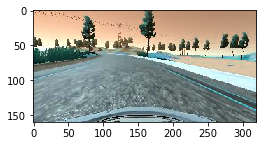

In [2]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
def display_im(X,y):
    index=random.randint(0,len(X))
    image=X[index].squeeze()
    plt.figure(figsize=(4,4))
    plt.imshow(image)
    print('Output Label for the input is :', y[index])
    

# Reshaping the images python list into numpy array
images=np.reshape(images,(-1,160,320,3))
measurements=np.reshape(measurements,(-1))


# Sample outputs from the dataset to check integrity
display_im(images,measurements)
print('Size of measurements is',measurements.shape)
print('One of the measurements is:',measurements[100])
print('Size of image:',images[2].shape)
print('Size of images numpy array:',images.shape)

## Splitting dataset into Training ,Validation and test set

In [3]:
from sklearn.model_selection import train_test_split

X=images
y=measurements

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.20, random_state=0)

print('X_train size = ',X_train.shape,'y_train size = ',y_train.shape)
print('X_valid size = ',X_valid.shape,'y_valid size = ',y_valid.shape)
print('X_test size = ',X_test.shape,'y_test size = ',y_test.shape)

X_train size =  (5142, 160, 320, 3) y_train size =  (5142,)
X_valid size =  (1286, 160, 320, 3) y_valid size =  (1286,)
X_test size =  (1608, 160, 320, 3) y_test size =  (1608,)


## Algorithm

In [4]:
from keras.models import Sequential
from keras.layers import Flatten,Dense, Lambda

model=Sequential()
model.add(Lambda(lambda x:x/255.0-0.5, input_shape=(160,320,3)))
model.add(Flatten(input_shape=(160,320,3)))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')
model.fit(X_train,y_train,validation_split=0.2,verbose=0)
model.save('model.h5')

Using TensorFlow backend.
